## Recommendation System: Project  AmazonElectronicsProduct Recommendation

#### <i> In this project our objective is to explore the Amazon Electronics product user rated dataset and accordingly use recommendation system that will recommend products based on selected product by an user which can recommend other products as well which are very likely to be bought by that user based on his/her preference or popoularity. This will help boost sales and thereby revenue.

In [1]:
import numpy as np # Linear Algebra
import pandas as pd # Data processing
import seaborn as sns # Data Visualization
from matplotlib import pyplot as plt # Data Visualization
import os

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
os.chdir('/gdrive/MyDrive/Colab Notebooks')

In [4]:
ls -l

total 150880
-rw------- 1 root root 77787439 Sep  2 16:22  books.csv
-rw------- 1 root root   163196 May  9  2020 'Copy of 1.Python_Basics.ipynb'
-rw------- 1 root root   424872 May  9  2020 'Copy of 2.Neural_Network.ipynb'
-rw------- 1 root root   152458 May  9  2020 'Copy of 3.Convolutional_Neural_Networks.ipynb'
-rw------- 1 root root    36526 May  9  2020 'Copy of 4.Recurrent_Neural_Network.ipynb'
-rw------- 1 root root   147555 Dec 19 21:02 'Copy of RecommendationSystem_R5_Project1_AmazonElectronicsProducts.ipynb'
-rw------- 1 root root 20870155 Dec 15 18:45  Electronic_dataset.csv
-rw------- 1 root root 11738238 Sep  1 06:04  jokes.csv
-rw------- 1 root root    59154 Dec 13 09:56  McCullohPitt_RosenBlat_Neurons.ipynb
-rw------- 1 root root 30682276 Sep  2 16:23  ratings.csv
-rw------- 1 root root    51825 Dec 18 17:58 'RecommendationSystem_R5_Project1_AmazonElectronicsProducts (1).ipynb'
-rw------- 1 root root    25241 Dec 27 14:13  RecommendationSystem_R5_Project1_AmazonElectron

#### 1. Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics)

In [5]:
Electronics_data=pd.read_csv("Electronic_dataset.csv",sep=',')

In [6]:
print('\033[1mHead:'); Electronics_data.head() # Read dataset

Head:


,user_id,prod_id,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600
2,A1SINU2I4IOPNU,B000GBO9IM,4.0,1358121600
3,A3P3P31EEOX2BD,B00CDCIOHO,3.0,1404950400
4,A3DBLJ3MPBJQMN,B000MS3VGA,5.0,1294444800


In [7]:
print('\033[1mTail:') ; Electronics_data.tail() # Read dataset

Tail:


,user_id,prod_id,ratings,timestamp
499995,AT1DOX4N48TXJ,B000P3X7RK,2.0,1210291200
499996,A224J6BHKCLMJM,B005CPGHAA,4.0,1359244800
499997,A23WSQC26QEFLC,B006FLK1IE,5.0,1323302400
499998,ARHZCDAH1UTPN,B006W5FHI2,5.0,1361577600
499999,A9XU2MMIWGZBT,B001JJRBU8,4.0,1237420800


In [8]:
print('\033[1mData records for electronics dataset:', Electronics_data.shape[0]) # Check data record count

Data records for electronics dataset: 500000


In [9]:
 Electronics_data.info() # check data type for each column and null value presence

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    500000 non-null  object 
 1   prod_id    500000 non-null  object 
 2   ratings    500000 non-null  float64
 3   timestamp  500000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


##### Inference: No null values in the dataset

In [10]:
Electronics_data['ratings'].unique() #check range for ratings

array([5., 4., 3., 1., 2.])

#### Inference: We have 50000 data records of users product rating. timestamp of user rating column is irrelevant for our solution requirement.

In [11]:
Electronics_data['ratings'] = Electronics_data['ratings'].astype(int) #Rating converted to integer data type

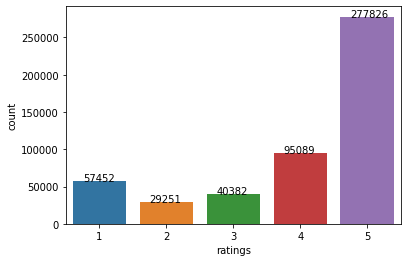

In [12]:
# Range for each rating on electronics product
plt.figure(figsize=(6,4))
ax = sns.countplot(x="ratings", data=Electronics_data,orient="h")
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

#### Inference: Of 50000 user-product ratings, we have high number records for the highest rating category and low number of records for lowest category.

In [13]:
Electronics_data.rename(columns = {'user_id':'userID','prod_id':'productID','ratings':'rating'}, inplace = True)
#Renaming column to standarize and ease

In [14]:
Electronics_data.drop(['timestamp'], axis=1,inplace=True)
#Dropping timestamp column

Further we analyze data with reference to product and user.

In [15]:
print("\033[1mUnique Product and Users :")
print("Total No of Users   :", len(np.unique(Electronics_data.userID)))
print("Total No of Products  :", len(np.unique(Electronics_data.productID)))

Unique Product and Users :
Total No of Users   : 448368
Total No of Products  : 130138


In [16]:
print("\033[1mRange of products rated per user :")
no_of_rated_products_per_user = Electronics_data.groupby(by='userID')['rating'].count().sort_values(ascending=False)
print("Maximum No of Products rated per user:",no_of_rated_products_per_user[0])
print("Minimum No of Product/s rated per user:",no_of_rated_products_per_user[448367])

Range of products rated per user :
Maximum No of Products rated per user: 36
Minimum No of Product/s rated per user: 1


In [17]:
print('no_of_rated_products_per_user - head:\n', no_of_rated_products_per_user.head(5))
print('\nno_of_rated_products_per_user - tail:\n',no_of_rated_products_per_user.tail(5))

no_of_rated_products_per_user - head:
 userID
A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
Name: rating, dtype: int64

no_of_rated_products_per_user - tail:
 userID
A3GQPPGY60XAOF           1
A3GQQWYTSH3G72           1
A3GQRF6Q5GH31D           1
A3GQRWGDK6HM94           1
A000186437REL8X2RW8UW    1
Name: rating, dtype: int64


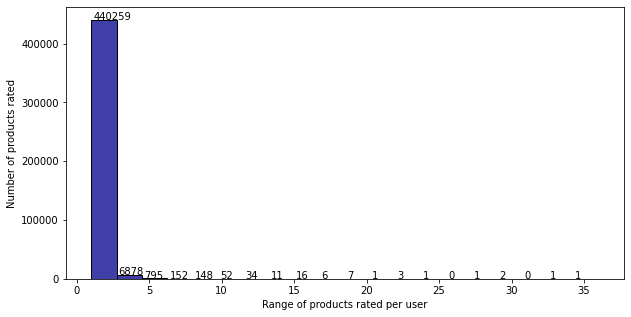

In [18]:
plt.figure(figsize=(10,5))
ax = sns.histplot(no_of_rated_products_per_user,kde = False, color='darkblue')
plt.xlabel('Range of products rated per user')
plt.ylabel('Number of products rated')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

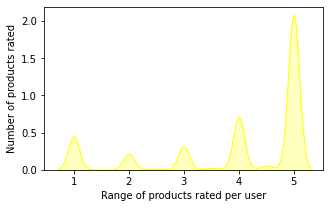

In [19]:
mean_rating_of_products_per_user = Electronics_data.groupby(by='userID')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(5,3))
sns.kdeplot(mean_rating_of_products_per_user, shade=True, color='yellow')
plt.xlabel('Range of products rated per user')
plt.ylabel('Number of products rated')
plt.show()

####  Inference:
1. Most of the individual users has rated only single product (440259 of 448368). Data has very few records where the same user have rated more than single product.users rating. 
2. Secondly we have most of high rated products by individual users. Hence many products are either not rated or most probably not bought by the user.
3. Overall records contain users those have very less products rated and that too which are good ones. Data could be biased for getting users best prefered products and not captured much data for inferior products or the store has mostly superior products.

In [20]:
print("\033[1mMaximum count range rated per product by users:")
no_of_products_rated_by_user = Electronics_data.groupby(by='productID')['rating'].count().sort_values(ascending=False)
print("No of Products that is most rated by user:",no_of_products_rated_by_user[0])
print("No of Products that is least rated by user:",no_of_products_rated_by_user[130137])
print("No of Unique_products:",no_of_products_rated_by_user.shape[0])

Maximum count range rated per product by users:
No of Products that is most rated by user: 1138
No of Products that is least rated by user: 1
No of Unique_products: 130138


In [21]:
mean_rating_product = Electronics_data.groupby(by='productID')['rating'].mean().sort_values(ascending=False)
mean_rating_product.tail(5)

productID
B0092TLBA8    1.0
B00DKRX7LO    1.0
B00DKVY35O    1.0
B00028LF8Q    1.0
0439886341    1.0
Name: rating, dtype: float64

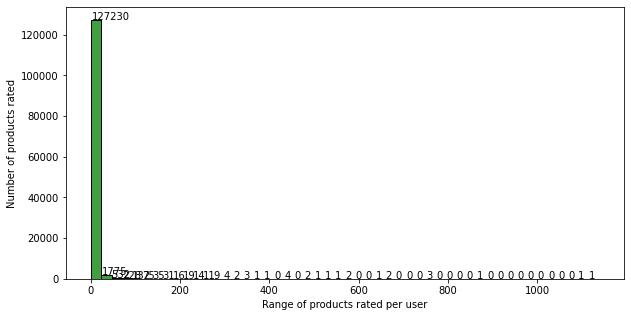

In [22]:
# Number of ratings per product KDE distribution
plt.figure(figsize=(10,5))
ax = sns.histplot(no_of_products_rated_by_user, bins = 50 ,kde = False, color='green')
plt.xlabel('Range of products rated per user')
plt.ylabel('Number of products rated')

for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()


In [23]:
#Check the rating_spread for the products
rating_spread = Electronics_data.groupby('productID')['rating'].std(ddof = -1)

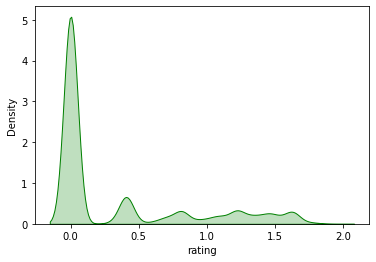

In [24]:
# Rating spread factor KDE distribution
sns.kdeplot(rating_spread, shade=True, color='green')
plt.show()

#### Inference:
1. Each product is atleast rated once by the user.
2. We do have a bunch of outliers that has only a single rating and few products have over 200 ratings.
3. Large porition of the Products being a single review the data records we have is sparse. 
4. For such sparse kind of data we need use model based collaborative filtering (with matrix factorization SVD) for recommendtation when user taste is to be taken in to account.
5. For users who has rated only 1 or 2 products, we shall recommend popular products and for users who has rated more products and model is able to know their preference we shall use collaborative - model based recommendation.

#### 2. Build Popularity Recommender model

In Popularity recommender model, popular products among the user based on the data is to be found out and recommended to user. For all users the popular recommender model will give the same recommendation irrespective users preferences.
Hence we create a dataset with popular products and recommend. Will have option to select count of popular product to user.

In [25]:
Popular_Data = Electronics_data.groupby('productID').agg({'userID':'count','rating':'mean'})
# based on no of rating for each product and average rating of those ratings.

In [26]:
Popular_Data.sort_values( by=['userID'],ascending=False, inplace = True)
Popular_Data.rename(columns={'userID':'number of ratings','rating':'rating_mean'},inplace=True)

# Sorting based top rated products.

In [27]:
Popular_Data.head(10)

,number of ratings,rating_mean
productID,,
B0074BW614,1138,4.465729
B00DR0PDNE,1094,3.943327
B007WTAJTO,883,4.417894
B0019EHU8G,774,4.740310
B006GWO5WK,770,4.275325
B003ELYQGG,765,4.386928
B003ES5ZUU,681,4.684288
B00622AG6S,668,4.419162
B007R5YDYA,659,4.738998


In [28]:
# Use popularity based recommender model to make predictions and giving count as option
def popular_recommend(user_id, c): 
    print('-' *58)
    print(' Here are the recommended popular products for you, top',c)
    print('-' *58)
    products_already_rated_by_user = Electronics_data[Electronics_data.userID ==user_id]['productID']
    user_recommendations = Popular_Data.drop(products_already_rated_by_user)
    print(user_recommendations.head(c))

In [29]:
popular_recommend('A5JLAU2ARJ0BO',5) # Recommend for top say 5 product for the user

----------------------------------------------------------
 Here are the recommended popular products for you, top 5
----------------------------------------------------------
            number of ratings  rating_mean
productID                                 
B0074BW614               1138     4.465729
B00DR0PDNE               1094     3.943327
B007WTAJTO                883     4.417894
B0019EHU8G                774     4.740310
B006GWO5WK                770     4.275325


The model will always recommend from the same above ordered Product_Data table to all users based on generic ranking method of average of all the ratings to the product. However we can have different ranking mechanism based on business requirement.

For user specific preference recommendation basis on users with similiar interests we will use collaborative filtering using surprise library from scikit for building the model.

#### 3. Split the data randomly into a train and test dataset. ( For example, split it in 70/30 ratio)

In [30]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 265kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1618296 sha256=5cf6f13f3e09df345672be300d12c2cc785446493cbeb49c2e46d27864e3d1a1
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [31]:
# importing surprise libraries
from surprise import Dataset, Reader, accuracy
import os
from surprise.model_selection import train_test_split

In [32]:
reader = Reader(rating_scale=(1, 5)) #rating scale fixing the same
data = Dataset.load_from_df(Electronics_data[['userID', 'productID', 'rating']], reader,)

In [33]:
data #data type

In [34]:
# Split data to train and test
trainset, testset = train_test_split(data, test_size=.30,random_state=123)

#### 4. Build Collaborative Filtering model.

Collaborative Filtering matches persons with similar interests and provides recommendations based on this matching. It is based on the idea that users similar to me can be used to predict how much I will like a particular product or service those users have used/experienced but I have not.

As data is sparse and huge we will use Model based SVD for collaborative filtering in our recommendation system

In [35]:
# Import SVD libraries and use gridsearch for parameter tuning
from surprise import SVD
from surprise.model_selection import GridSearchCV

param_grid = {'n_factors':[5, 50, 100],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1],'random_state':[3],'biased':[True]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.3400824289359885
{'n_factors': 5, 'n_epochs': 30, 'lr_all': 0.005, 'reg_all': 0.1, 'random_state': 3, 'biased': True}


In [36]:
# With above paramenters tuned we will build the model using trainset
from surprise import SVD
svd_model = SVD(n_factors=5,n_epochs=30, lr_all=0.005, reg_all= 0.1, random_state=3,biased = True )
svd_model.fit(trainset)

In [37]:
#Evaluating the model using cross validation results
from surprise.model_selection import cross_validate
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3345  1.3359  1.3359  1.3357  1.3426  1.3369  0.0029  
MAE (testset)     1.0561  1.0583  1.0579  1.0582  1.0639  1.0589  0.0026  
Fit time          11.92   11.95   12.11   12.08   12.15   12.04   0.09    
Test time         1.06    1.03    0.64    0.61    0.64    0.80    0.20    


{'fit_time': (11.922641038894653,
  11.945330381393433,
  12.111747026443481,
  12.079667568206787,
  12.150163173675537),
 'test_mae': array([1.05611441, 1.05832676, 1.0579398 , 1.05824216, 1.06392192]),
 'test_rmse': array([1.33445708, 1.33591365, 1.33590604, 1.33569427, 1.34260002]),
 'test_time': (1.0590527057647705,
  1.03218674659729,
  0.6430861949920654,
  0.6111798286437988,
  0.639378547668457)}

We have average RSME = 1.336 which is the best so far obtained from the SVD model built. Lets proceed to evaluate.

#### 5. Evaluate the above model. 

In [38]:
test_pred = svd_model.test(testset) #Predict the test data set using the model

In [39]:
accuracy.rmse(test_pred)

RMSE: 1.1088


1.108809728822818

In [40]:
test_pred[0:5]

[Prediction(uid='A11451Y0YZCN17', iid='B000KE48CM', r_ui=5.0, est=4.333307316980519, details={'was_impossible': False}),
 Prediction(uid='A2IGUUFF9J3HL', iid='B000KJQ1DG', r_ui=5.0, est=4.774766800283441, details={'was_impossible': False}),
 Prediction(uid='A1PHD1SQ704SRN', iid='B008AJNF78', r_ui=2.0, est=2.9573487458196217, details={'was_impossible': False}),
 Prediction(uid='A2P5ZKNHDQ4WCM', iid='B000XA8766', r_ui=2.0, est=3.2662550076768055, details={'was_impossible': False}),
 Prediction(uid='A3OLVK2W0AVWLH', iid='B00BYRPM9M', r_ui=1.0, est=3.726810813745325, details={'was_impossible': False})]

#### Inference:
1. We have testset accuracy much better with RSME 1.1088.  In above we can see product 'B000KE48CM' was rated as 5 by user 'A11451Y0YZCN17' and the model has predicted it to be rated by user as 4.333307316980519.
2. SVD model is able to provide predictions much accurately even with sparse data.

#### 6. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.

To recommend new products based on user chozen product, we must create a correlation matrix that will enable to recommend highly correlated books based on data of other users with similiar choices. 

We can reduce the data set if we filter data which only contains the customers who have given ratings more than 4 times and put them into a dataframe. This makes sense also instead of taking whole data. Since we are providing the recommendation of the products to the customers, it is better to remove data based on the userId rather than productId. For others we would recommend the popular data set.

In [41]:
data_new=Electronics_data.groupby('userID').filter(lambda x: x['rating'].count()>=4)

In [42]:
data_new.shape

(14535, 3)

In [43]:
data_new.head(5)

,userID,productID,rating
26,A2HX3D3MPPASNS,B004I3VZM2,4
64,A3PAYT2SQY7J3H,B002WR7VSS,5
67,A3MLSY6VS7AB8O,B001IBHF5S,5
125,A23M8B84K9TSBJ,B0017KMI66,5
214,AZNUHQSHZHSUE,B000FJEYZI,1


In [44]:
# Hybrid Matrix for user id and product id and their ratings
matrix=pd.pivot_table(data=data_new, values='rating', index='userID',columns='productID',fill_value=0)
matrix.head()

productID,1400501466,1400532620,1400532655,140053271X,3744295508,5135000011,7507825604,8862935293,9573212919,9985511476,9985696999,B000001OM4,B000001OMA,B000006OQ8,B00000DM9M,B00000DM9W,B00000DMA3,B00000J1SC,B00000J1US,B00000J4FS,B00000J4VK,B00000JD4V,B00000JDF5,B00000JDFJ,B00000JI4F,B00000JLSJ,B00000JMO3,B00000JMRX,B00000JRHX,B00000JXV3,B00000K0JC,B00000K135,B00001MXYW,B00001P4XH,B00001P4ZH,B00001W0DI,B00001WRI4,B00001WRSJ,B00001X5AZ,B00001ZUJA,...,B00JTYYV0I,B00JUI6SV8,B00JVOTUGQ,B00JVVU0SQ,B00JX1ZS5O,B00JXECZIY,B00JXLGE70,B00JXLGECA,B00JXPP9RW,B00JXUUVWU,B00JY4QCJQ,B00JZC972Q,B00K0HMR8G,B00K0HMSQM,B00K163ETW,B00K23WA9E,B00K2L3G5I,B00K6B7KJM,B00K76VHRC,B00K7KEZ0O,B00K7O2DJU,B00K8942SO,B00KCAPAKI,B00KCG95M6,B00KCQISWY,B00KDIT95G,B00KFD0O0I,B00KGTDDIG,B00KH8PU6E,B00KHA2DQM,B00KHA5G6G,B00KIMX4EY,B00KK9481I,B00KMRGB7C,B00KMRGF28,B00KO6DS3Q,B00KWMNDDM,B00KYMCJF8,B00L2442H0,B00L26YDA4
userID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A0655860XQH1M5Q8JH1M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A100UD67AHFODS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A100WO06OQR8BQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A102F7EHNVW30Q,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
A105S56ODHGJEK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
matrix.shape

(2753, 10876)

We now have matrix with 10876 products and 2753 users data (2753 X 10876)

In [46]:
X = matrix.T # Transposing the data product wise ( Product ID X User ID)
X.shape

(10876, 2753)

In [47]:
from sklearn.decomposition import TruncatedSVD
# Truncate to build a matrix with more than 5 features and get new decomposed matrix M = Product ID X Features
# Used Truncated SVD to create the model based 10 features.
Trunc_svd = TruncatedSVD(n_components= 5) #5 can be changed based on domain knowledge on count of features that could distinguish the products
decomposed_matrix = Trunc_svd.fit_transform(X) 
decomposed_matrix.shape   #Product ID x Features

(10876, 5)

In [48]:
# Creating correlation matrix between the products (Product ID x Product ID)
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(10876, 10876)

In [49]:
# Using panda DataFrame on further processing of the correlation Coeff data of 10876 products
DF = pd.DataFrame(correlation_matrix,columns=X.index.values,index=X.index.values)
DF

,1400501466,1400532620,1400532655,140053271X,3744295508,5135000011,7507825604,8862935293,9573212919,9985511476,9985696999,B000001OM4,B000001OMA,B000006OQ8,B00000DM9M,B00000DM9W,B00000DMA3,B00000J1SC,B00000J1US,B00000J4FS,B00000J4VK,B00000JD4V,B00000JDF5,B00000JDFJ,B00000JI4F,B00000JLSJ,B00000JMO3,B00000JMRX,B00000JRHX,B00000JXV3,B00000K0JC,B00000K135,B00001MXYW,B00001P4XH,B00001P4ZH,B00001W0DI,B00001WRI4,B00001WRSJ,B00001X5AZ,B00001ZUJA,...,B00JTYYV0I,B00JUI6SV8,B00JVOTUGQ,B00JVVU0SQ,B00JX1ZS5O,B00JXECZIY,B00JXLGE70,B00JXLGECA,B00JXPP9RW,B00JXUUVWU,B00JY4QCJQ,B00JZC972Q,B00K0HMR8G,B00K0HMSQM,B00K163ETW,B00K23WA9E,B00K2L3G5I,B00K6B7KJM,B00K76VHRC,B00K7KEZ0O,B00K7O2DJU,B00K8942SO,B00KCAPAKI,B00KCG95M6,B00KCQISWY,B00KDIT95G,B00KFD0O0I,B00KGTDDIG,B00KH8PU6E,B00KHA2DQM,B00KHA5G6G,B00KIMX4EY,B00KK9481I,B00KMRGB7C,B00KMRGF28,B00KO6DS3Q,B00KWMNDDM,B00KYMCJF8,B00L2442H0,B00L26YDA4
1400501466,1.000000,0.674661,-0.737647,0.366075,-0.226580,-0.849458,-0.504814,-0.261251,0.579530,-0.195283,0.934897,-0.837183,0.785739,-0.413295,0.021800,-0.533799,0.019121,-0.962957,-0.401960,-0.588223,0.954561,0.958695,0.852223,-0.772059,0.646889,-0.251626,0.379774,-0.953181,0.958697,0.919874,0.740377,0.802134,0.554932,0.659588,0.424512,0.739311,-0.119836,0.964356,-0.419759,-0.906623,...,0.334520,0.349388,-0.931467,-0.743696,-0.578626,-0.373082,-0.949198,0.980552,0.100197,-0.870603,-0.198436,0.850214,0.575233,-0.738100,-0.352489,-0.853883,-0.956869,-0.182417,0.542682,0.442906,-0.808116,0.655917,-0.766067,0.911036,0.956550,-0.228235,-0.870617,-0.549606,0.884192,-0.923072,0.809583,-0.086232,0.799505,-0.182417,-0.390166,0.910293,0.706534,-0.182417,-0.159887,0.911036
1400532620,0.674661,1.000000,-0.770011,0.533097,-0.571806,-0.880202,-0.155887,0.223613,0.218619,-0.731882,0.689531,-0.363946,0.321780,-0.498704,0.337150,0.170104,-0.320778,-0.845217,0.023677,-0.138356,0.575210,0.787935,0.948779,-0.183921,0.527641,-0.180769,0.847973,-0.850658,0.469999,0.804229,0.771820,0.309730,0.717320,0.532490,0.943863,0.734098,-0.553407,0.747246,0.382729,-0.554940,...,-0.148937,-0.120315,-0.837306,-0.724933,-0.509707,-0.789909,-0.766529,0.770069,-0.509566,-0.413251,-0.411406,0.268185,0.164835,-0.100676,-0.521269,-0.838374,-0.680557,-0.506248,0.280893,0.649593,-0.940512,0.799074,-0.545551,0.442363,0.691362,0.015329,-0.291942,-0.892298,0.882441,-0.433503,0.140033,-0.436421,0.158176,-0.506248,-0.697925,0.551847,0.080312,-0.506248,-0.330282,0.442363
1400532655,-0.737647,-0.770011,1.000000,-0.884705,-0.064128,0.951204,-0.177396,-0.455608,-0.715060,0.597129,-0.617867,0.335119,-0.703601,-0.070392,-0.668044,-0.103975,-0.192775,0.824594,-0.262621,-0.084059,-0.651378,-0.671524,-0.763729,0.622893,-0.464870,-0.313315,-0.315050,0.869126,-0.701143,-0.610896,-0.939111,-0.322332,-0.854839,-0.467237,-0.579812,-0.507341,0.750753,-0.768143,0.001829,0.425168,...,0.305374,0.361980,0.896601,0.950941,0.741007,0.709739,0.848345,-0.849515,-0.127685,0.311717,0.467886,-0.292358,-0.742137,0.557139,0.699073,0.962523,0.865499,0.772365,0.046572,-0.928110,0.907460,-0.956488,0.356230,-0.746069,-0.620039,-0.332565,0.348991,0.430565,-0.647628,0.661398,-0.334640,0.724865,-0.365886,0.772365,0.108186,-0.420931,-0.343515,0.772365,0.575646,-0.746069
140053271X,0.366075,0.533097,-0.884705,1.000000,0.366669,-0.741212,0.610677,0.762178,0.731717,-0.679930,0.182051,0.018221,0.567720,0.458151,0.867990,0.450644,0.249497,-0.485368,0.669577,0.459590,0.325998,0.281869,0.445223,-0.461751,0.093864,0.699235,0.066806,-0.551947,0.386390,0.213762,0.839701,-0.115312,0.718056,0.090631,0.392273,0.090332,-0.908117,0.383837,0.171636,-0.007931,...,-0.677939,-0.737130,-0.586865,-0.775733,-0.743387,-0.733134,-0.569992,0.525854,0.222921,0.127252,-0.607578,-0.124414,0.722526,-0.395979,-0.811599,-0.766376,-0.597848,-0.964864,-0.502616,0.989156,-0.691054,0.897810,0.105273,0.505871,0.243953,0.535369,0.068776,-0.150098,0.257712,-0.385243,-0.029506,-0.952283,0.000788,-0.964864,0.227208,-0.039670,0.145685,-0.964864,-0.787307,0.505871
3744295508,-0.22

In [50]:
def hybrid_recommend(user_id, usr_product,corr,n=5):
  print('-' *83)
  print(' Here are the recommended products based on selected product and popularity, top',n)
  print('-' *83)
  name = usr_product # Product selected by the user
  products_already_rated_by_user = Electronics_data[Electronics_data.userID ==user_id]['productID'] # Product already bought and rated by user
  #get top 5 products based on correlation coeff
  newDF = pd.DataFrame(DF.loc[name,:]).sort_values(name, ascending=False).drop(index=name)
  newDF = newDF.drop(products_already_rated_by_user).head(n) # drop products already rated by user and fetch the top n recommended for that user

  idx = np.intersect1d(newDF.index, Popular_Data.index) # find the 5 products in the popular product table for its popularity and rating average
  Recommend_Data = Popular_Data.loc[idx].sort_values('number of ratings', ascending=False) # sort based on popularity
  print(Recommend_Data)


In [51]:
hybrid_recommend('A5JLAU2ARJ0BO', 'B00L26YDA4',5)
#hybrid_recommend('B00LXEC8CU',5)

-----------------------------------------------------------------------------------
 Here are the recommended products based on selected product and popularity, top 5
-----------------------------------------------------------------------------------
            number of ratings  rating_mean
productID                                 
B00AXX0I7Y                 18     4.111111
B0011Z2402                 12     4.333333
B00IP8IBYG                  3     5.000000
B0000D88OS                  1     5.000000
B00KCG95M6                  1     3.000000


In [52]:
# list products which are not in hybrid model
diffidx = np.setdiff1d(Popular_Data.index,DF.index)
diffidx = pd.DataFrame(np.unique(diffidx), columns={'ID'})

In [53]:
diffidx.shape

(119262, 1)

In [54]:
#recommendation function based on selected product by user. 
#If the product is available in hybrid model then will use the hrbird model else list the popular product.
def recommend(user, product_selected, n = 5):
  seriesObj = diffidx['ID'].isin([product_selected])
  columnNames = list(seriesObj[seriesObj == True].index)
  if not columnNames:
    hybrid_recommend(user, product_selected,n)
  else:
    popular_recommend(user, n)

In [55]:
recommend('A5JLAU2ARJ0BO','B00L26YDA4',5) # Example for selected product available in hybrid model

-----------------------------------------------------------------------------------
 Here are the recommended products based on selected product and popularity, top 5
-----------------------------------------------------------------------------------
            number of ratings  rating_mean
productID                                 
B00AXX0I7Y                 18     4.111111
B0011Z2402                 12     4.333333
B00IP8IBYG                  3     5.000000
B0000D88OS                  1     5.000000
B00KCG95M6                  1     3.000000


In [56]:
recommend('A5JLAU2ARJ0BO','B00LXEC8CU',5) # Example for selected product NOT available in hybrid model

----------------------------------------------------------
 Here are the recommended popular products for you, top 5
----------------------------------------------------------
            number of ratings  rating_mean
productID                                 
B0074BW614               1138     4.465729
B00DR0PDNE               1094     3.943327
B007WTAJTO                883     4.417894
B0019EHU8G                774     4.740310
B006GWO5WK                770     4.275325


#### 7. Summarise your insights.

1. While exploring the data we found that the data is very sparse where in most of the individual users have rated only single products and that too highest rating.
2. Also these products are rated by only few users.Hence ratings inference is not precise.
3. Since most of the user rated only single product their taste or preference may not be precise. However we assume their taste to be similiar to other users who have rated similiar products.
4. Such dataset which is sparse where in its difficult to find correlation of the rated products and have a very very accurate recommendation system to recommend products that are highly correlated to the selected product by the user.
5. Secondly the dataset is huge datasize but with very limited information.
6. With such sparse set recommending products using Model Based collaborative recommendation ( SVD, PMF, NMF, Neural nets) is better than Memory Based recommendation(Item-Item / User-User / Knn clustering).
7. To take in to account scaling and sparse issue we built a Matrix factorisation SVD based model to recommend products which could be similiar to selected product by the user. The SVD model will be able to provide hidden correlation information based on the user ratings (more than 4 rating per product).
8. Using surprize library, we have evaulated model that using svd we could estimate user preference based on the their preference with an RMSE accuracy of 1.33 on train and test dataset which seems best achieveable tuning the hyperparameters.
9. SVD with 5 components was able to best model when we have tested estimated rating with actual rating on test dataset. Hence we would need SVD which takes more than 5 feature components. We used truncated SVD to improve the speed of computation with not reducing quality of the model.
10. For most of the data where in the correlation information could not be retrieved we recommended popular products from the popular dataset.


### Thank You